In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df =dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)  if pd.notna(x) else x)

In [3]:
df_us = df[df['job_country'] == 'United States'].dropna(subset='salary_year_avg')

In [10]:
jobs = df_us['job_title_short'].value_counts().sort_values(ascending=False).index[:6].to_list()

In [11]:
jobs

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [12]:
df_us = df_us[df_us['job_title_short'].isin(jobs)]

In [19]:
cor = df_us.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

In [20]:
cor

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

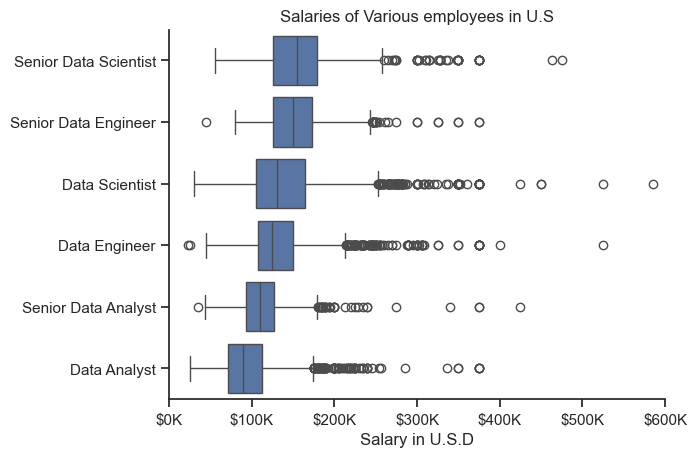

In [28]:
sns.boxplot(data = df_us ,x='salary_year_avg',y='job_title_short',order=cor)
sns.set_theme(style='ticks')
sns.despine()
plt.title('Salaries of Various employees in U.S')
plt.xlim(0,600000)
plt.ylabel('')
plt.xlabel('Salary in U.S.D')
ticks_x=plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

In [29]:
df_us = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] =='United States' )].dropna(subset='salary_year_avg')
df_us = df_us.explode('job_skills')

In [34]:
jb_count = df_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).copy().sort_values(by='count',ascending=False)

In [37]:
jb_count= jb_count.head(10).sort_values(by='median',ascending=False)
jb_count

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


In [38]:
jb_median = df_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).copy().sort_values(by='median',ascending=False).head(10)

In [39]:
jb_median

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


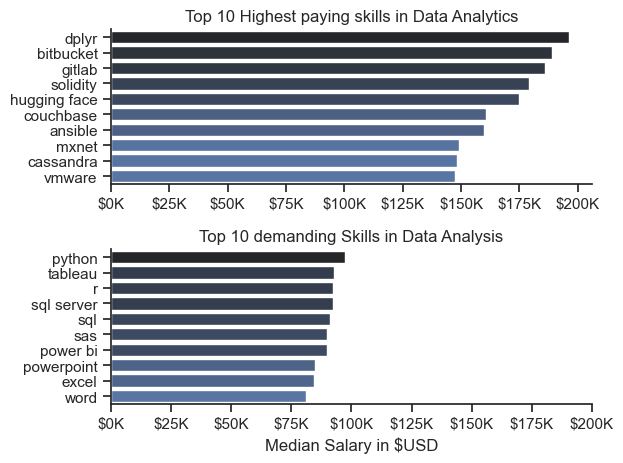

In [61]:
fig,ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data= jb_median,x= 'median',y='job_skills',ax=ax[0],hue='median',palette='dark:b_r')
ax[0].set_title('Top 10 Highest paying skills in Data Analytics')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().set_visible(False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data = jb_count,y='job_skills',x='median',ax=ax[1],hue='median',palette='dark:b_r')
ax[1].set_title('Top 10 demanding Skills in Data Analysis')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary in $USD')
ax[1].legend().set_visible(False)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(0,200000)
fig.tight_layout()
